#  Smart Irrigation System using Machine Learning

##  Problem Statement
Agricultural irrigation consumes a large portion of the world’s freshwater resources. Inefficient irrigation practices lead to water waste and crop damage. This project aims to predict whether sprinklers should be turned ON or OFF based on 20 sensor inputs, enabling data-driven, water-efficient farming.

##  SDG Alignment
- **SDG 6: Clean Water and Sanitation** – Promotes efficient water use.
- **SDG 2: Zero Hunger** – Supports sustainable agriculture and food production.
- **SDG 12: Responsible Consumption and Production**- Encourages efficient use of natural resources through smart irrigation management.

- **SDG 13: Climate Action**-Reduces environmental impact by optimizing water usage, supporting climate-resilient agriculture.


Logging Setup  
Set up basic logging to monitor the application's runtime behavior.  
Logs include timestamps, log levzzels (INFO, ERROR, etc.), and messages.  
Useful for debugging and tracking application flow.

In [1]:
# Logging setup
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')



Importing Necessary Libraries  
This section loads all the Python libraries required for:
- Data manipulation (`pandas`, `numpy`)  
- Visualization (`matplotlib`, `seaborn`)  
- Machine learning (`scikit-learn`) including training and evaluation  
- Model saving/loading (`joblib`)  
Also includes inline plotting for notebooks.


In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
import joblib

Ensure Model Saving Directory Exists  
Check and create a directory named `saved_models` if it doesn’t exist already.  
This directory will be used to store the trained machine learning model files.


In [3]:
#  Ensure model saving directory exists
import os
MODEL_DIR = "saved_models"
os.makedirs(MODEL_DIR, exist_ok=True)


STEP 1: Load and Preview the Dataset  
Load the irrigation dataset from a CSV file.  
This step helps inspect the structure and format of the data by displaying the first few rows.


In [4]:

# STEP 1: LOAD AND PREPROCESS DATA


# Load the dataset (update the filename accordingly)
df = pd.read_csv("irrigation_machine.csv")
# first 5 rows to be printed, df.tail()
df.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


Inspect Dataset Information  
Use `.info()` to get a concise summary of the DataFrame, including:  
- Total rows and columns  
- Column names and data types  
- Non-null (non-missing) counts  
This helps detect missing values and understand the dataset's size and structure.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

Display Column Names  
Use `.columns` to view all the column headers in the dataset.  
This is useful to identify which columns are features (inputs) and which are targets (outputs).


In [6]:
df.columns

Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

Drop Unnecessary Index Column  
Remove the `'Unnamed: 0'` column, which is likely an automatically generated index column when the dataset was saved.  
This helps clean up the dataset for further processing.


In [7]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


View Summary Statistics of the Dataset  
Use `.describe()` to generate basic statistical insights for each numeric column, including:  
- Count, mean, standard deviation  
- Minimum, 25%, 50%, 75%, and maximum values  
This helps in understanding the range, distribution, and potential outliers in your features.


In [8]:
df.describe() # Statistics of the dataset

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,1.901000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,1.518668,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,2.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,3.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,9.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000



STEP 2: Define Features and Labels  
Split the dataset into:  
- **`X` (features):** Sensor values from columns 0 to 19  
- **`y` (labels):** Sprinkler output values from column 20 onwards  
This prepares the data for model training and prediction.


In [9]:

# STEP 2: DEFINE FEATURES AND LABELS


X = df.iloc[:, 0:20]   # This gives you columns 0 to 19 (sensor_0 to sensor_19)


y = df.iloc[:, 20:]

Preview Random Sample of Input Features  
Use `.sample(10)` to randomly select and display 10 rows from the feature set `X`.  
This helps inspect sensor values and verify that the feature selection is correct.


In [10]:
X.sample(10)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
340,1.0,0.0,2.0,3.0,1.0,0.0,4.0,7.0,1.0,0.0,3.0,2.0,7.0,0.0,5.0,2.0,3.0,1.0,1.0,0.0
1105,1.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,1.0,1.0,3.0,7.0,6.0,3.0,5.0,1.0,3.0,2.0,1.0,2.0
727,3.0,2.0,3.0,4.0,1.0,2.0,3.0,0.0,0.0,3.0,0.0,3.0,6.0,4.0,2.0,3.0,1.0,3.0,2.0,1.0
1735,0.0,1.0,6.0,3.0,10.0,1.0,4.0,2.0,0.0,1.0,3.0,5.0,5.0,4.0,2.0,2.0,4.0,0.0,1.0,3.0
1545,1.0,3.0,3.0,3.0,4.0,1.0,3.0,4.0,1.0,4.0,2.0,1.0,5.0,2.0,2.0,1.0,3.0,2.0,1.0,0.0
869,3.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,4.0,1.0,3.0,3.0,1.0,3.0,3.0,2.0,2.0,1.0,2.0,0.0
1422,1.0,1.0,1.0,2.0,3.0,0.0,1.0,1.0,1.0,3.0,1.0,3.0,12.0,5.0,7.0,0.0,1.0,0.0,3.0,1.0
847,0.0,3.0,4.0,4.0,4.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,5.0,1.0,5.0,3.0,3.0,0.0,3.0
544,0.0,1.0,4.0,5.0,3.0,1.0,1.0,3.0,2.0,4.0,7.0,3.0,3.0,5.0,5.0,1.0,4.0,1.0,1.0,1.0
1375,3.0,1.0,1.0,0.0,2.0,0.0,3.0,3.0,4.0,5.0,1.0,2.0,3.0,1.0,3.0,2.0,4.0,3.0,1.0,3.0


Preview Random Sample of Target Labels  
Use `.sample(10)` to randomly view 10 rows from the label set `y`.  
This allows you to verify the sprinkler ON/OFF values selected as the prediction targets.


In [11]:
y.sample(10)

,parcel_0,parcel_1,parcel_2
421,1,1,1
1809,1,1,1
1376,1,1,1
87,0,1,0
1546,1,1,0
975,1,1,1
1206,0,1,0
1990,1,0,0
1547,0,1,0
379,1,1,0


Inspect Feature Set Structure (`X.info()`)  
Display data types, non-null counts, and memory usage of the feature set `X`.  
This helps ensure:
- No missing values in the input features  
- All columns are of the correct data type (e.g., `float64` for continuous values)


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  sensor_19  2000 non-null   float64
dtypes: float

In [13]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   parcel_0  2000 non-null   int64
 1   parcel_1  2000 non-null   int64
 2   parcel_2  2000 non-null   int64
dtypes: int64(3)
memory usage: 47.0 KB


In [14]:
X

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,2.0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,2.0,2.0,4.0,3.0,3.0,0.0,1.0,0.0,6.0,2.0
1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,3.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,1.0,0.0
1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,0.0,2.0,0.0,3.0,0.0


Check the Shape of Features and Labels  
Use `.shape` to verify the number of samples (rows) and features/labels (columns):  
- `X.shape` → Rows × Feature columns (sensor inputs)  
- `y.shape` → Rows × Label columns (sprinkler outputs)  
This ensures both `X` and `y` have the same number of rows before training.


In [15]:
X.shape, y.shape

((2000, 20), (2000, 3))

Normalize Feature Values with MinMaxScaler  
Scale all feature values (`X`) to a uniform range between 0 and 1.  
This is important for many machine learning models to perform well, especially when input features are on different scales.


In [16]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.125     , 0.22222222, 0.1       , ..., 0.09090909, 0.9       ,
        0.28571429],
       [0.625     , 0.11111111, 0.3       , ..., 0.18181818, 0.2       ,
        1.        ],
       [0.375     , 0.11111111, 0.4       , ..., 0.27272727, 0.1       ,
        0.        ],
       ...,
       [0.125     , 0.33333333, 0.3       , ..., 0.36363636, 0.1       ,
        0.        ],
       [0.25      , 0.11111111, 0.        , ..., 0.        , 0.3       ,
        0.        ],
       [0.        , 0.11111111, 0.4       , ..., 0.45454545, 0.2       ,
        0.14285714]])

Plot Distribution of Sensor Values  
Create histograms for each of the 20 sensor input columns to understand:  
- Value distribution (e.g., uniform, skewed)  
- Range and spread  
- Potential outliers  
This helps verify data quality before model training.


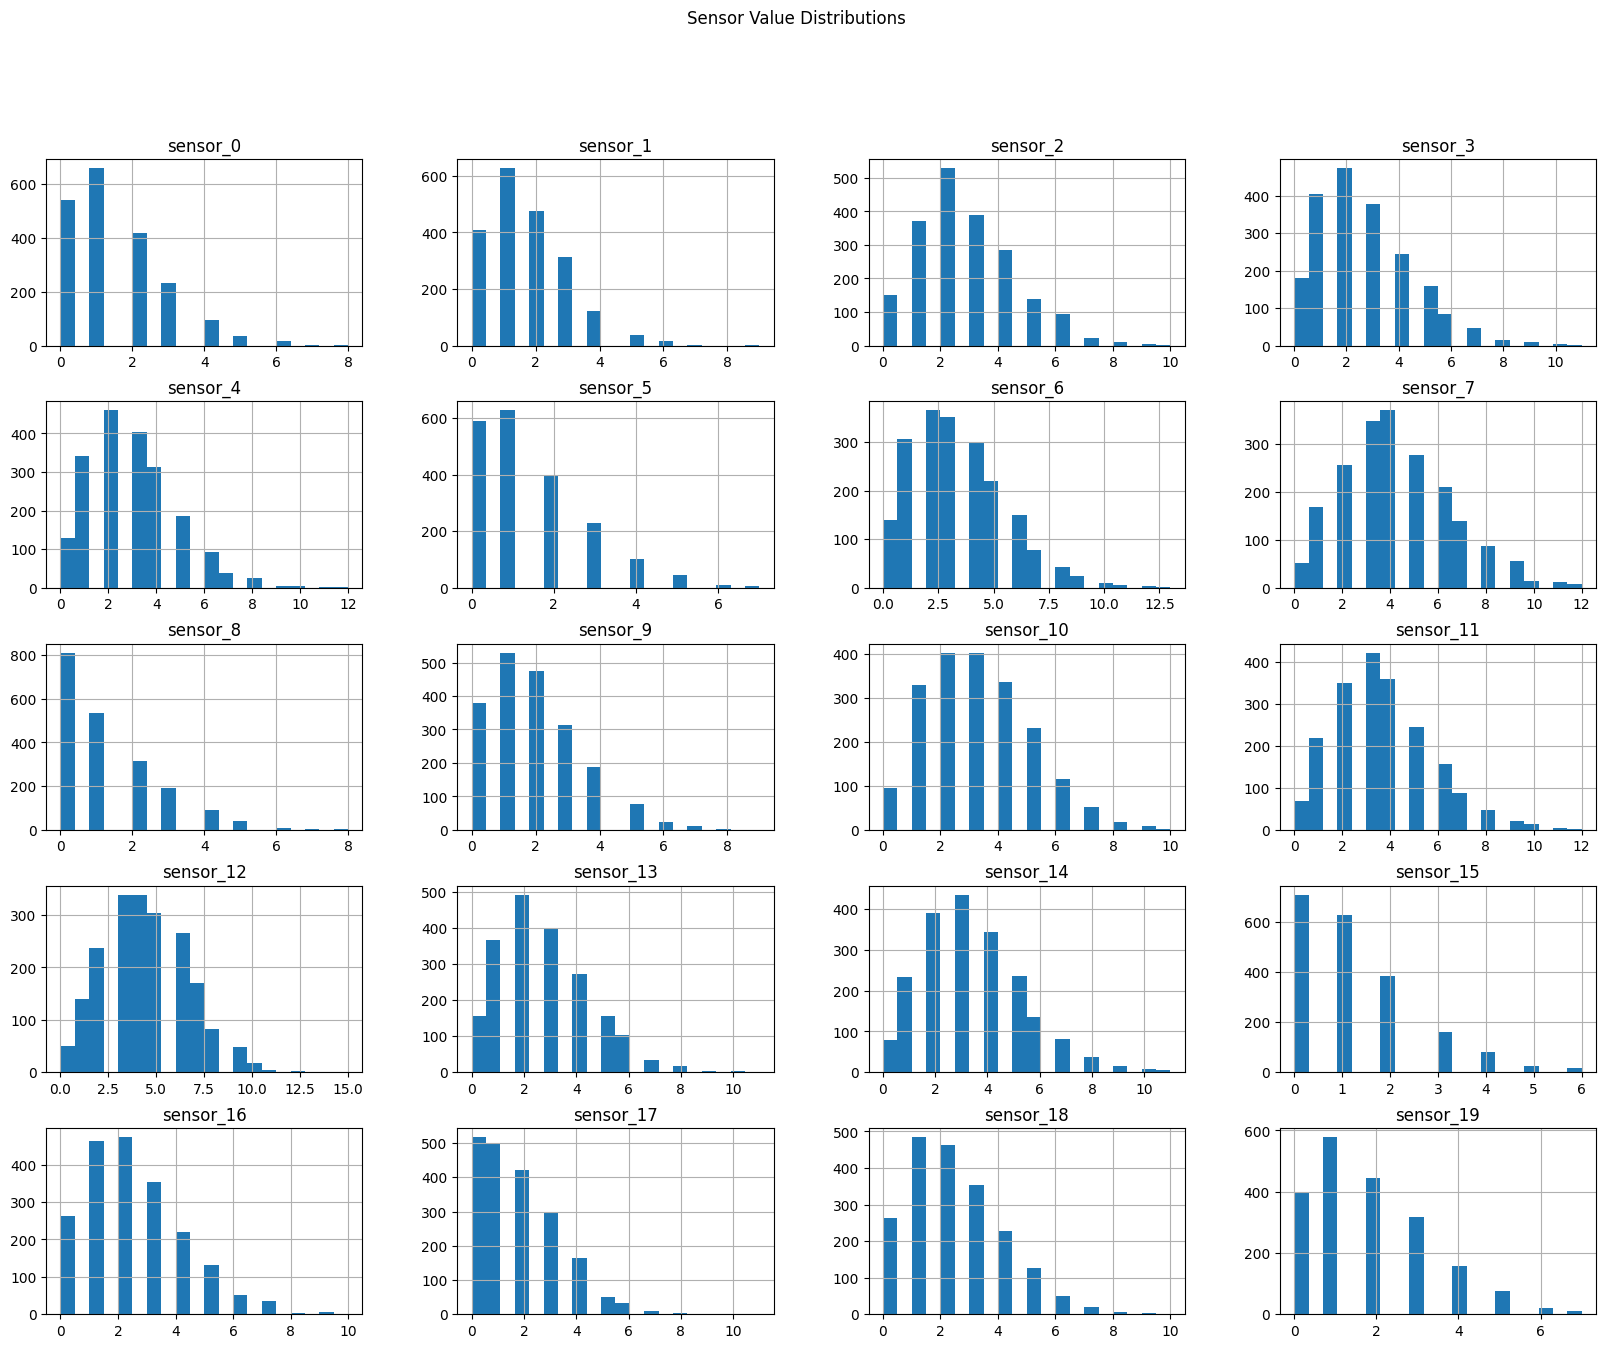

In [17]:
# Plot distribution of sensor values
df.iloc[:, 0:20].hist(bins=20, figsize=(20, 15))
plt.suptitle("Sensor Value Distributions")
plt.show()

Correlation Heatmap of All Features  
Generate a heatmap to visualize the pairwise correlations between all features in the dataset.  
This helps identify:
- Highly correlated sensors (multicollinearity)  
- Relationships between sensors and sprinkler outputs  
Useful for feature selection or dimensionality reduction.


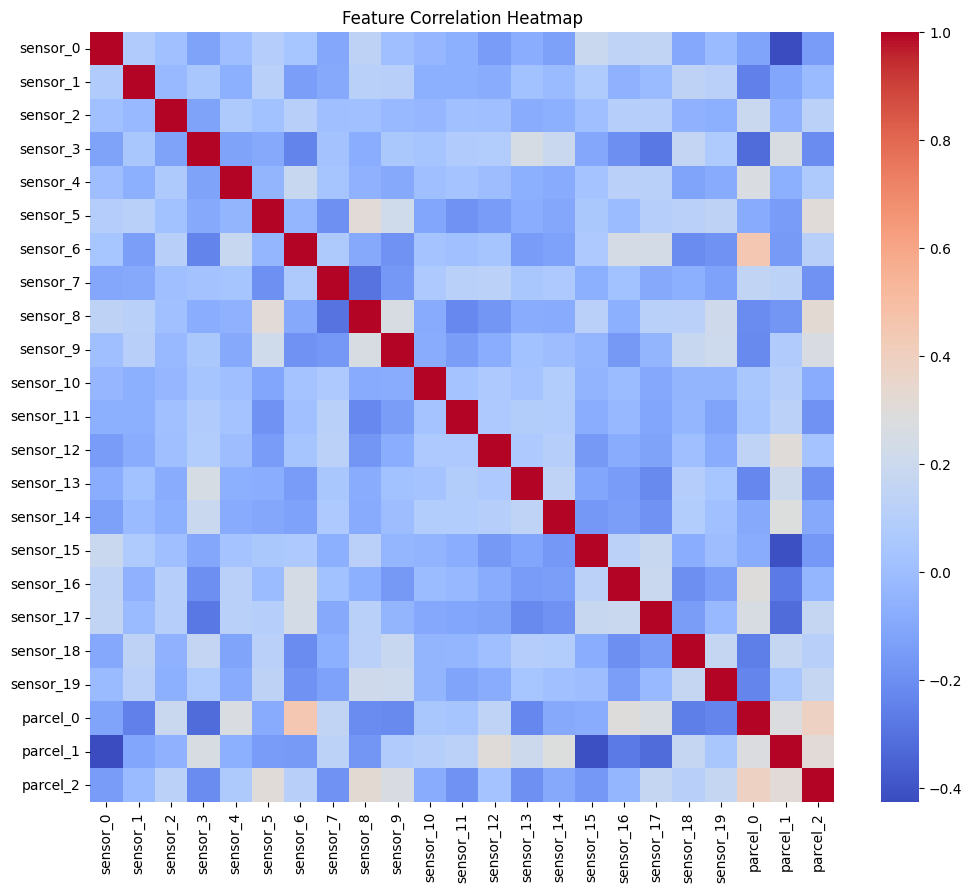

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Sprinkler Activation Summary  
Plot a bar chart showing how many times each sprinkler (sprinkler_0 to sprinkler_19) was ON in the dataset.  
This helps identify:
- Imbalanced activation (some sprinklers used more often than others)  
- Potential data bias in the target labels


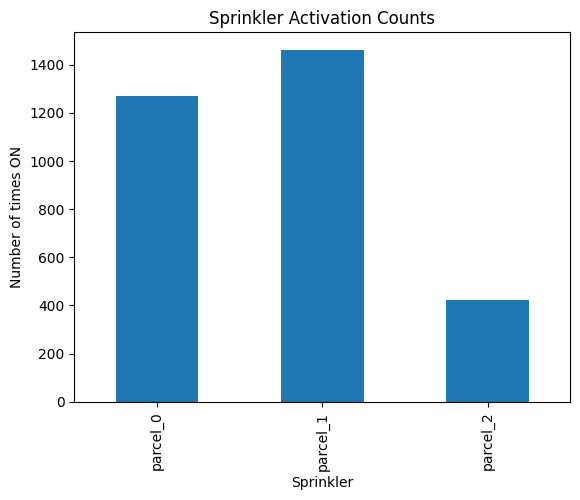

In [19]:
# Sprinkler output summary
df.iloc[:, 20:].sum().plot(kind='bar')
plt.title("Sprinkler Activation Counts")
plt.xlabel("Sprinkler")
plt.ylabel("Number of times ON")
plt.show()

STEP 3: Train-Test Split  
Split the dataset into training and testing sets:  
- 80% for training the model  
- 20% for evaluating how well it performs on unseen data  
`random_state=42` ensures reproducibility of the split.


In [20]:

# STEP 3: TRAIN-TEST SPLIT


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600, 3), (400, 3))

STEP 4: Train the Classifier (Multi-label)  
Use a `RandomForestClassifier` wrapped in `MultiOutputClassifier` to train a model that can predict multiple outputs (sprinklers) at once.  
Custom hyperparameters are provided to fine-tune performance and avoid overfitting.


In [22]:

# STEP 4: TRAIN CLASSIFIER


# Use MultiOutputClassifier to handle multi-label classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Custom hyperparameters for RandomForest
rf = RandomForestClassifier(
    n_estimators=200,         # Number of trees
    max_depth=10,             # Maximum depth of each tree
    min_samples_split=4,      # Minimum samples to split a node
    min_samples_leaf=2,       # Minimum samples per leaf
    max_features='sqrt',      # Number of features to consider at each split ('auto', 'sqrt', 'log2', or int)
    random_state=42
)

# Wrap it with MultiOutputClassifier
model = MultiOutputClassifier(rf)

# Train the model
model.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=4,
                                                       n_estimators=200,
                                                       random_state=42))

STEP 5: Evaluate the Model  
Use the trained model to make predictions on the test set, then print a classification report to evaluate performance.  
The report includes precision, recall, F1-score, and support for each spr


In [23]:

# STEP 5: EVALUATE MODEL


y_pred = model.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=y.columns))

Classification Report:
              precision    recall  f1-score   support

    parcel_0       0.87      0.93      0.90       256
    parcel_1       0.91      0.97      0.94       304
    parcel_2       0.93      0.48      0.64        87

   micro avg       0.89      0.89      0.89       647
   macro avg       0.90      0.80      0.83       647
weighted avg       0.90      0.89      0.88       647
 samples avg       0.82      0.79      0.79       647



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Count ON Activations for Selected Sprinklers  
Display the total number of times `parcel_0`, `parcel_1`, and `parcel_2` were ON (value = 1) across the entire dataset.  
This helps you understand activation frequency and potential imbalance between sprinkler zones.


In [24]:
print(df[['parcel_0', 'parcel_1', 'parcel_2']].sum())

parcel_0    1271
parcel_1    1461
parcel_2     424
dtype: int64


Train and Evaluate a Basic Random Forest Model  
Train a simple `RandomForestClassifier` (without hyperparameter tuning) on the training data.  
Then evaluate its performance using a classification report.  
This helps establish a baseline for comparing tuned models.


In [25]:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       256
           1       0.91      0.99      0.95       304
           2       0.92      0.52      0.66        87

   micro avg       0.90      0.91      0.90       647
   macro avg       0.91      0.82      0.84       647
weighted avg       0.90      0.91      0.90       647
 samples avg       0.82      0.80      0.80       647



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Comparison: Random Forest vs Logistic Regression  
Train and evaluate two models using `MultiOutputClassifier`:  
- A Random Forest model  
- A Logistic Regression model  
Then compare their overall accuracy scores on the scaled test set to identify which performs better for multi-label sprinkler prediction.


In [32]:
#Model comparison
from sklearn.linear_model import LogisticRegression

rf_model = MultiOutputClassifier(RandomForestClassifier(random_state=42)).fit(X_train_scaled, y_train)
lr_model = MultiOutputClassifier(LogisticRegression(max_iter=1000)).fit(X_train_scaled, y_train)

rf_score = rf_model.score(X_test_scaled, y_test)
lr_score = lr_model.score(X_test_scaled, y_test)

print(f"Random Forest Accuracy: {rf_score:.4f}")
print(f"Logistic Regression Accuracy: {lr_score:.4f}")


Random Forest Accuracy: 0.7175
Logistic Regression Accuracy: 0.6825


Visualize Parcel (Sprinkler) Activation Combinations Over Time

This block visualizes the activation of sprinklers in various combinations:
- Individual parcels (Parcel 0, 1, 2)
- Pairwise combinations (e.g., Parcel 0 & 1)
- All parcels ON simultaneously

Each subplot uses a different chart style (bar, line, or area) and unique color to improve readability.


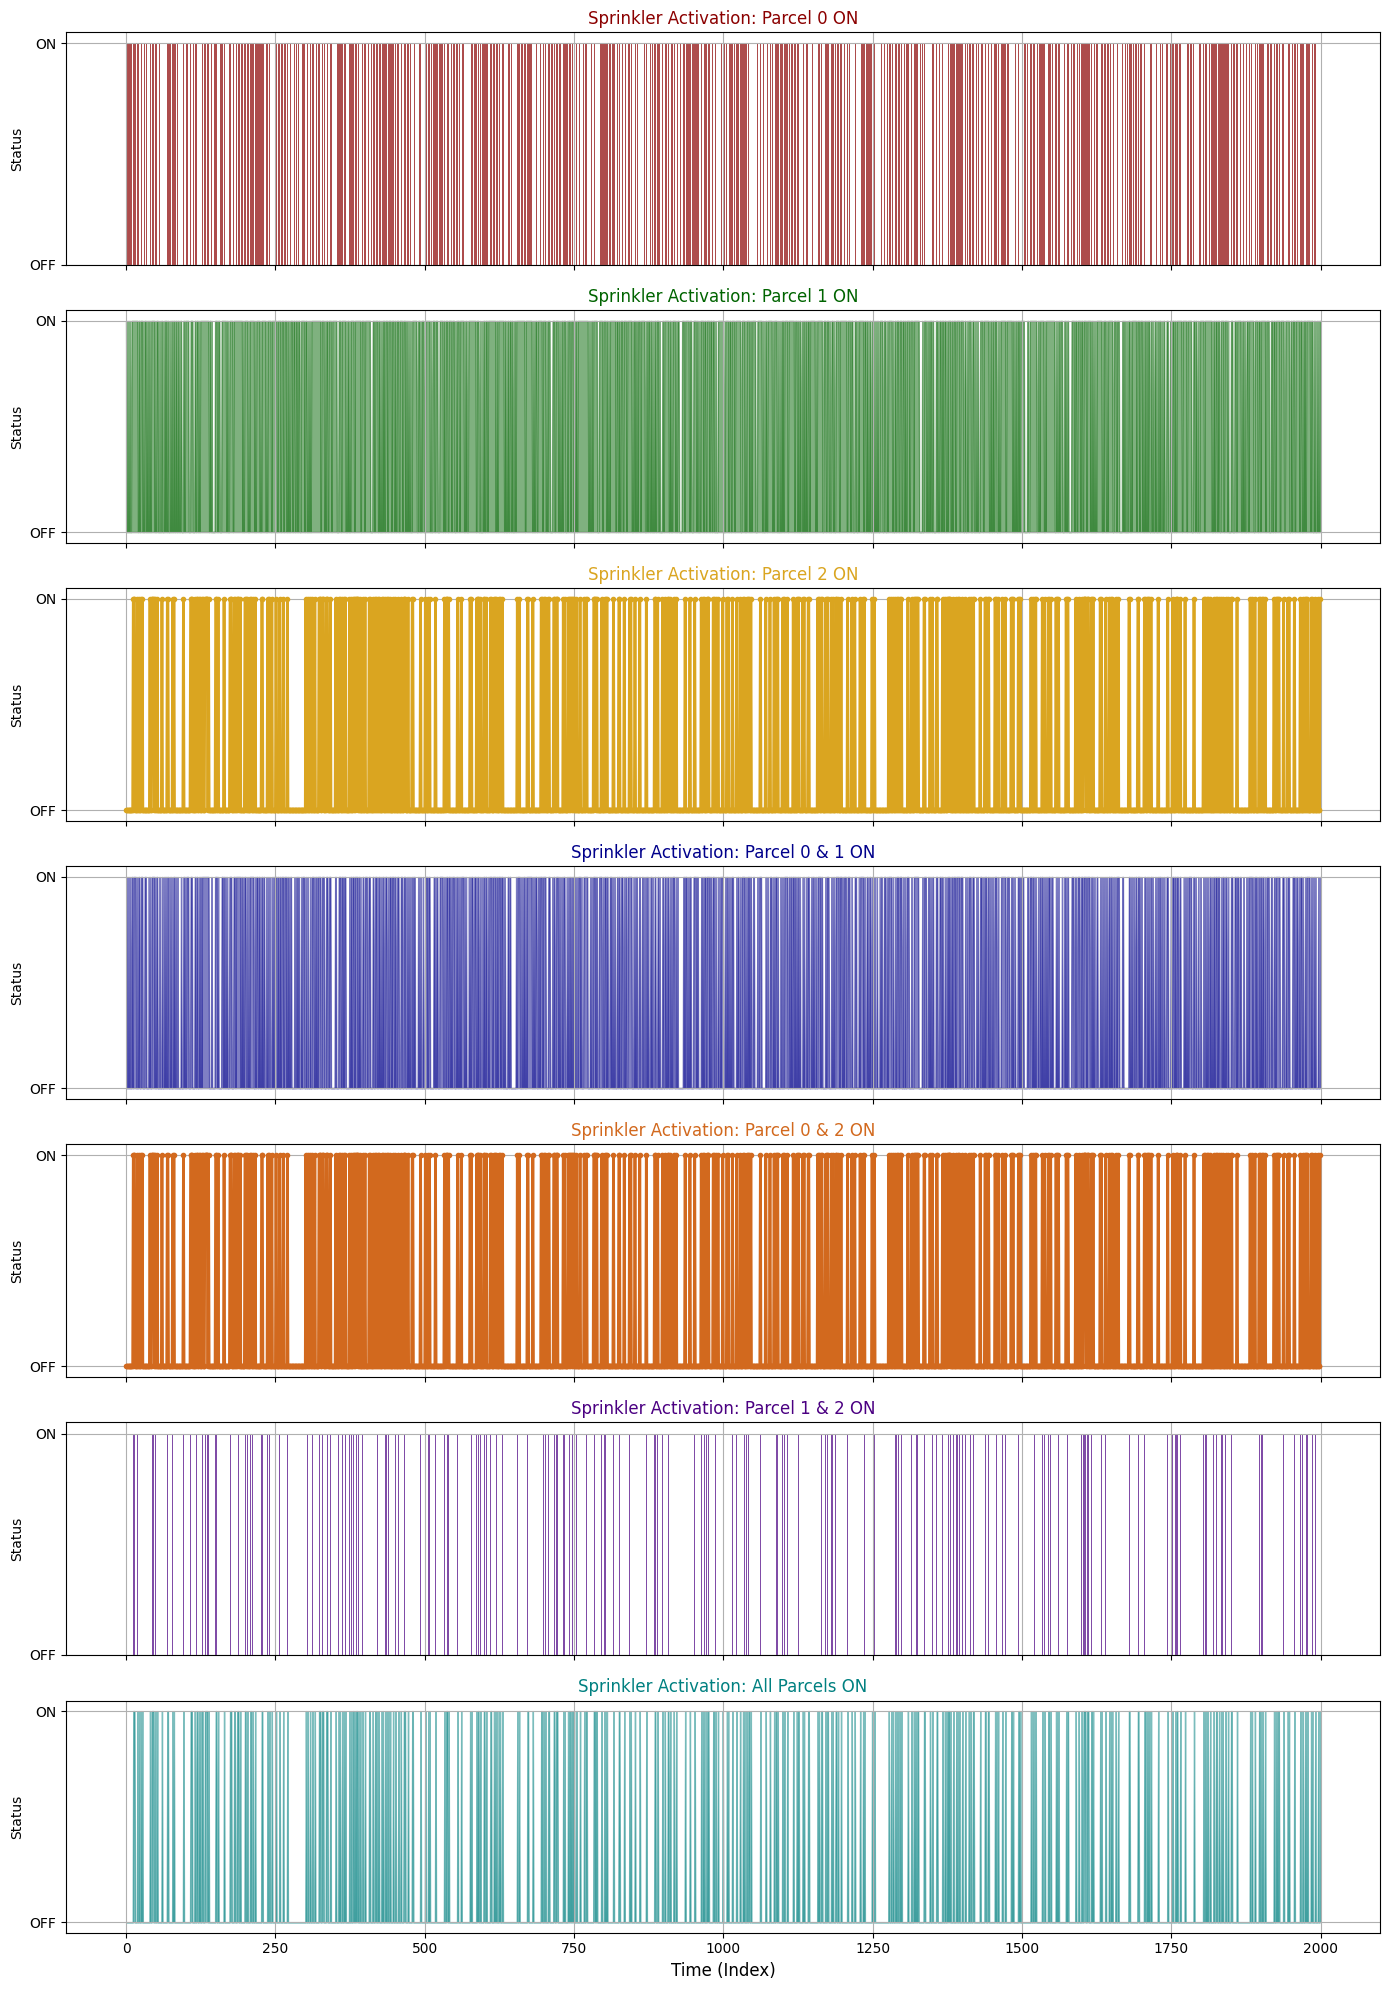

In [27]:


# Define parcel activation conditions
conditions = {
    "Parcel 0 ON": df['parcel_0'],
    "Parcel 1 ON": df['parcel_1'],
    "Parcel 2 ON": df['parcel_2'],
    "Parcel 0 & 1 ON": df['parcel_0'] & df['parcel_1'],
    "Parcel 0 & 2 ON": df['parcel_0'] & df['parcel_2'],
    "Parcel 1 & 2 ON": df['parcel_1'] & df['parcel_2'],
    "All Parcels ON": df['parcel_0'] & df['parcel_1'] & df['parcel_2'],
}

# Use dark named colors
colors = ['darkred', 'darkgreen', 'goldenrod', 'darkblue', 'chocolate', 'indigo', 'teal']
plot_styles = ['bar', 'area', 'line', 'area', 'line', 'bar', 'area']

fig, axs = plt.subplots(nrows=len(conditions), figsize=(14, 20), sharex=True)

for ax, (title, condition), color, style in zip(axs, conditions.items(), colors, plot_styles):
    y = condition.astype(int)

    if style == 'line':
        ax.plot(df.index, y, color=color, linewidth=2, marker='o', markersize=3)
    elif style == 'bar':
        ax.bar(df.index, y, color=color, alpha=0.7)
    elif style == 'area':
        ax.fill_between(df.index, 0, y, color=color, alpha=0.5)

    ax.set_title(f"Sprinkler Activation: {title}", fontsize=12, color=color)
    ax.set_ylabel("Status", fontsize=10)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['OFF', 'ON'])
    ax.grid(True)

axs[-1].set_xlabel("Time (Index)", fontsize=12)
plt.tight_layout()
plt.show()


Visualize Combined Sprinkler Pump Activity (Stacked Area Chart)

This chart displays the individual and overlapping activity of:
- Parcel 0
- Parcel 1
- Parcel 2

It uses a stacked area plot to show when each sprinkler is ON, and overlays a shaded background to indicate when **any** of the sprinklers is active.  
Helpful for visualizing usage density, synchronizatio


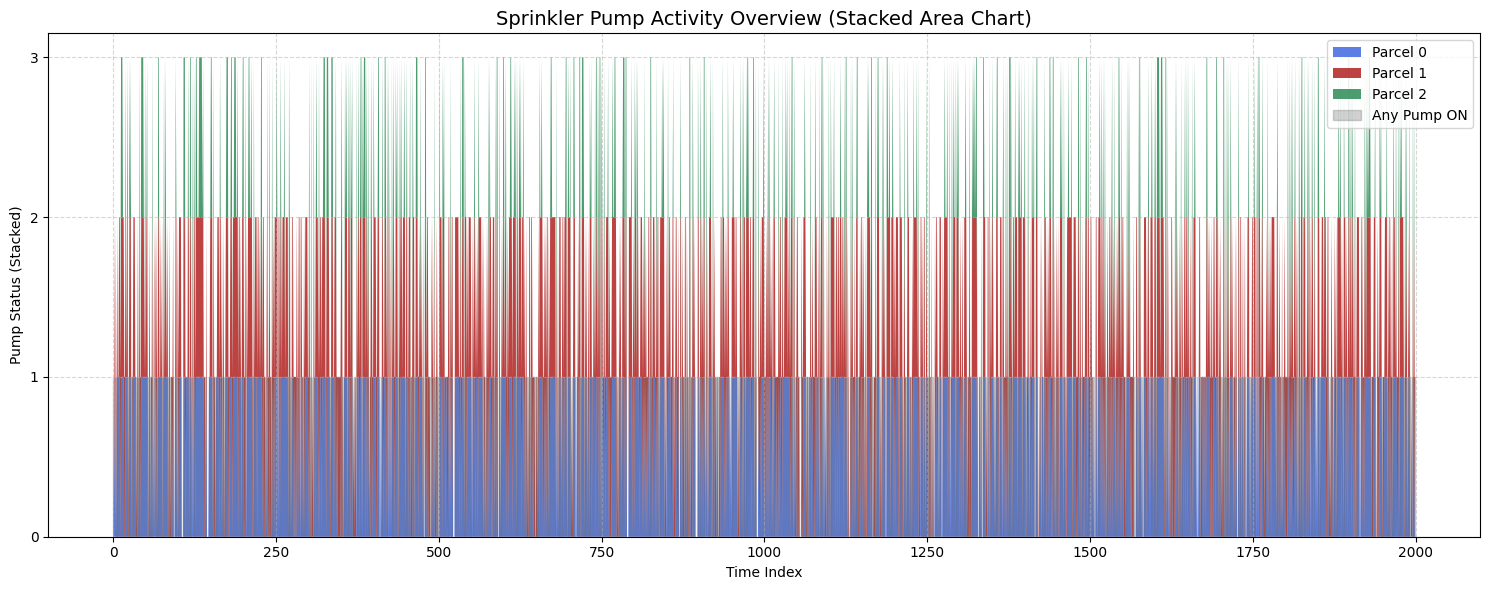

In [28]:
# Calculate combined activity of all pumps (overlap)
any_pump_on = df[['parcel_0', 'parcel_1', 'parcel_2']].any(axis=1)

plt.figure(figsize=(15, 6))
plt.title("Sprinkler Pump Activity Overview (Stacked Area Chart)", fontsize=14)

# Stacked area data
pump_data = df[['parcel_0', 'parcel_1', 'parcel_2']]

# Darker named colors
colors = ['royalblue', 'firebrick', 'seagreen']  # Parcel 0, 1, 2

# Plot stacked area
plt.stackplot(df.index,
              pump_data['parcel_0'],
              pump_data['parcel_1'],
              pump_data['parcel_2'],
              labels=['Parcel 0', 'Parcel 1', 'Parcel 2'],
              colors=colors,
              alpha=0.85)

# Overlay background for "any pump on"
plt.fill_between(df.index, 0, 1, where=any_pump_on, color='dimgray', alpha=0.3, step='mid', label='Any Pump ON')

plt.xlabel("Time Index")
plt.ylabel("Pump Status (Stacked)")
plt.yticks([0, 1, 2, 3])
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Confusion Matrix Plotting for Each Sprinkler (Multi-label)  
This function plots individual confusion matrices for each output label (e.g., `parcel_0`, `parcel_1`, etc.).  
Each matrix shows:
- True Positives (TP)
- True Negatives (TN)
- False Positives (FP)
- False Negatives (FN)  
It helps diagnose model performance per sprinkler.


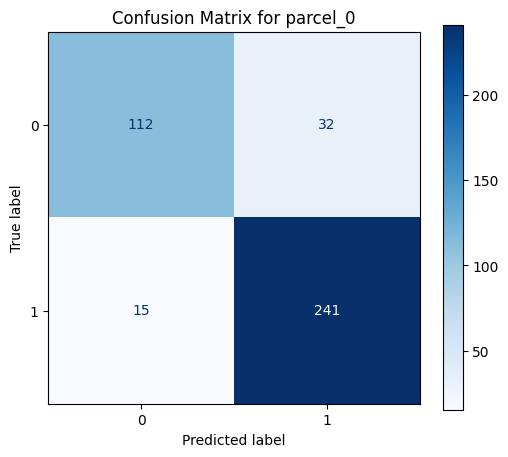

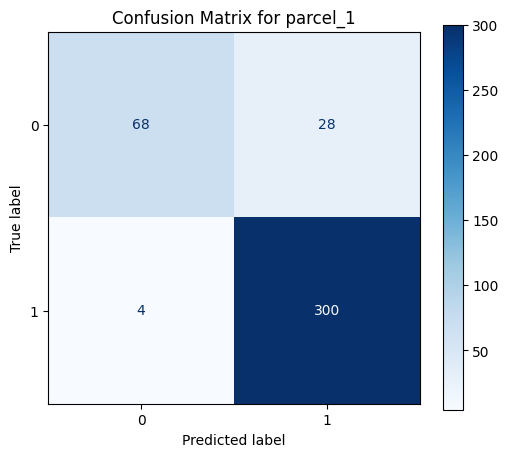

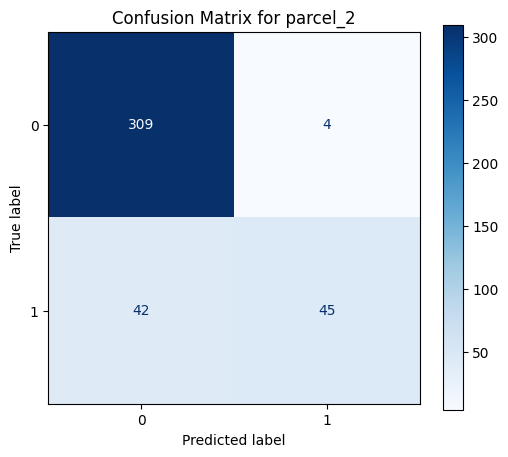

In [29]:
# Confusion Matrix Plotting Function
from sklearn.metrics import ConfusionMatrixDisplay


def plot_conf_matrix(y_true, y_pred, labels=None):
    # Iterate through each output label and plot confusion matrix
    for i, label in enumerate(labels):
        fig, ax = plt.subplots(figsize=(6, 5))
        # Selecting the i-th column for true and predicted labels
        ConfusionMatrixDisplay.from_predictions(y_true.iloc[:, i], y_pred[:, i], ax=ax, cmap="Blues")
        ax.set_title(f"Confusion Matrix for {label}")
        plt.grid(False)
        plt.show()

# Assuming y_test and y_pred are pandas DataFrames or numpy arrays
y_pred = np.array(y_pred)

# Get the column names from y_test to use as labels
labels = y_test.columns.tolist()

plot_conf_matrix(y_test, y_pred, labels=labels)

Save the Trained Model to a File  
Use `joblib.dump()` to serialize and save the trained model (`model`) into a `.pkl` file.  
This allows you to reuse the model later without retraining, especially useful for deployment in a Streamlit app or other systems.


In [30]:
import joblib
from sklearn.pipeline import Pipeline

joblib.dump(model, "Farm_Irrigation_System.pkl")

['Farm_Irrigation_System.pkl']